# Lorenz curves

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from utils import CATEGORIES, extract_crime_data

In [3]:
# get the crime data
FORCE = "metropolitan"
crime_data = extract_crime_data(FORCE)
crime_data

,Month,Reported by,Falls within,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,geometry
Crime ID,,,,,,,,,,
3becbfd875f51d027eafca0fae403462c0d5556803b3d99ca1955523f567e309,2022-05,Metropolitan Police Service,Metropolitan Police Service,On or near Sedbury Road,E01031345,Adur 003A,Violence and sexual offences,Investigation complete; no suspect identified,NaN,POINT (517381.023 105978.981)
4eb75a25ab5dbd7f05aae4d1824837f5e257300eb99bd1684758d8d1f53cf452,2022-05,Metropolitan Police Service,Metropolitan Police Service,On or near Wingfield Road,E01019404,Amber Valley 001D,Vehicle crime,Status update unavailable,NaN,POINT (440237.011 355204.95)
622b4945cf3282890d4dc65b4de967ff9423587a6f226819c72d627e02e1a100,2022-05,Metropolitan Police Service,Metropolitan Police Service,On or near The Millers,E01031472,Arun 006C,Violence and sexual offences,Investigation complete; no suspect identified,NaN,POINT (497723.989 102765.02)
4ae61b3f5f5269dfe261e6713e4d04a89d1810032101c7ca4c963498d44cb1ec,2022-05,Metropolitan Police Service,Metropolitan Police Service,On or near Barque Close,E01031408,Arun 007B,Violence and sexual offences,Status update unavailable,NaN,POINT (504308.966 102807.987)
86094d298bede17d6d5c82be5dd7b2af5b0d2efb02b45821f8c021cfb43fda35,2022-05,Metropolitan Police Service,Metropolitan Police Service,On or near Sycamore Lane,E01032821,Ashford 004J,Violence and sexual offences,Status update unavailable,NaN,POINT (599008.968 143679.996)
...,...,...,...,...,...,...,...,...,...,...
ae8df181715e2eb0355917fbf5cda6f067882a9892ec1d385aac158ab2a29527,2025-04,Metropolitan Police Service,Metropolitan Police Service,On or near Fareham Crescent,E01010489,Wolverhampton 028A,Violence and sexual offences,Under investigation,NaN,POINT (388166.006 296880.997)
6577e74908fc248bb4f92457428df29979b92720fb5e142e0367eeb49caf856e,2025-04,Metropolitan Police Service,Metropolitan Police Service,On or near Garrick Road,E01031780,Worthing 005C,Violence and sexual offences,Under investigation,NaN,POINT (515000.028 103736.02)
c9dc8c80fbea2ff419d61859fdda495ebf59f202f15f73d00312bc612ffd1036,2025-04,Metropolitan Police Service,Metropolitan Police Service,On or near Garrick Road,E01031780,Worthing 005C,Violence and sexual offences,Under investigation,NaN,POINT (515000.028 103736.02)


In [4]:
# compute spatio-temporo-categorical counts
all_lsoas = crime_data["LSOA code"].unique()
all_categories = crime_data["Crime type"].unique()
counts = crime_data.groupby(["Month", "LSOA code", "Crime type"])["Reported by"].count()
counts

Month    LSOA code  Crime type                  
2022-05  E01000001  Bicycle theft                   1
                    Theft from the person           1
                    Violence and sexual offences    1
         E01000002  Burglary                        1
                    Other theft                     3
                                                   ..
2025-04  W01001822  Violence and sexual offences    2
         W01001869  Violence and sexual offences    1
         W01001913  Burglary                        1
         W01002004  Violence and sexual offences    1
         W01002019  Criminal damage and arson       1
Name: Reported by, Length: 1089926, dtype: int64

## See how stable rates are for 3 categories

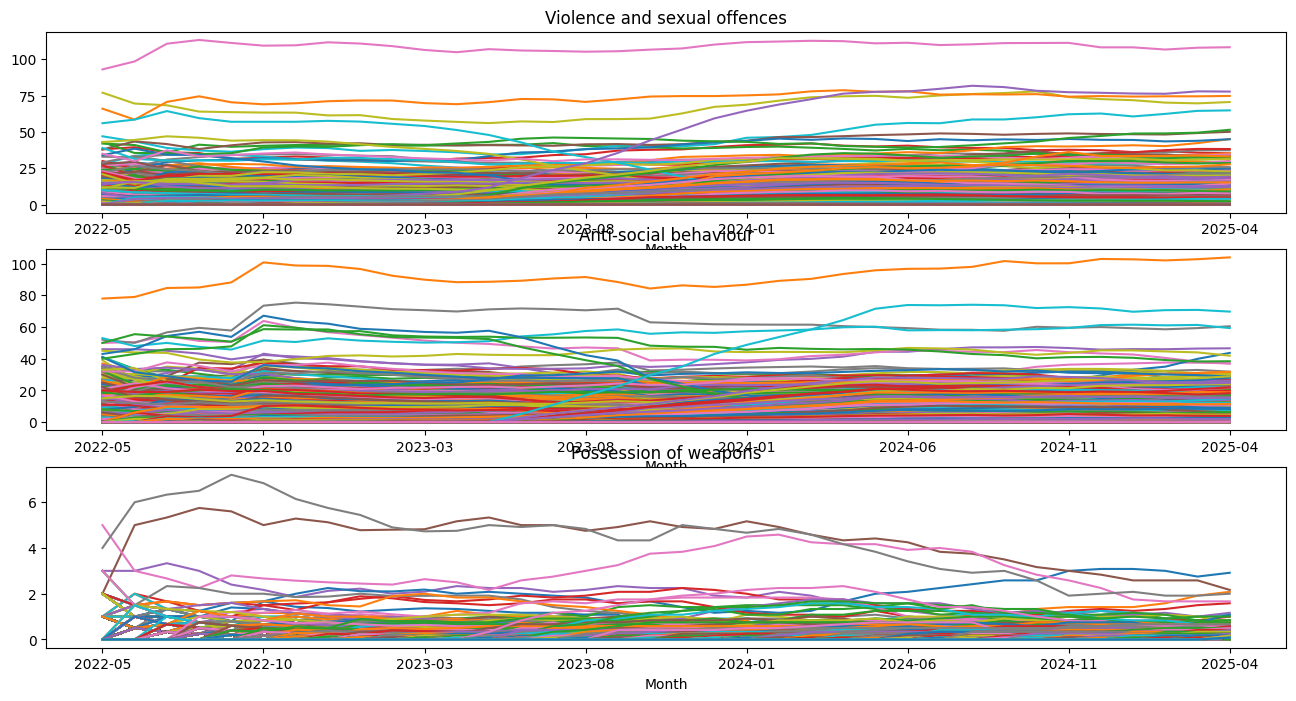

In [5]:
fig, axs = plt.subplots(3, figsize=(18, 9))
for i, category in enumerate(CATEGORIES):
    cat_counts = (
        counts.loc[(slice(None), slice(None), category)]
        .unstack(level="LSOA code", fill_value=0)
        .rolling(12, min_periods=1)
        .mean()
    )
    cat_counts.plot(legend=False, figsize=(16, 8), title=category, ax=axs[i])

## Compute Lorenz curves for the 3 year mean in each locations for each category

Text(0.5, 1.0, 'Lorenz curves')

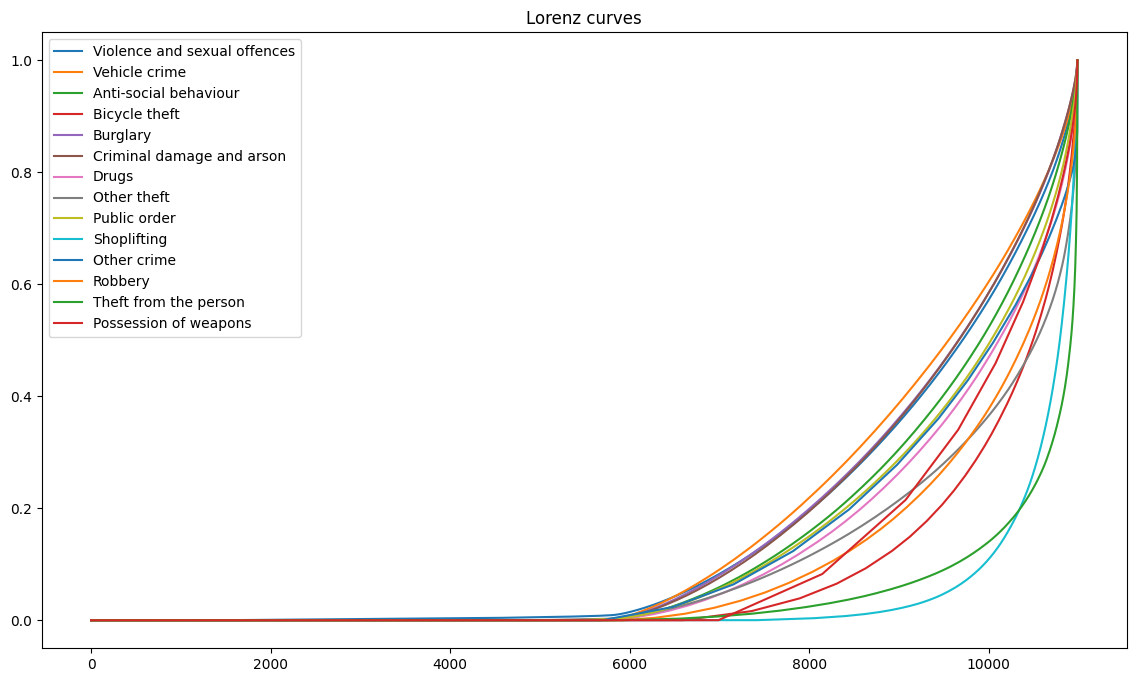

In [6]:
fig, ax = plt.subplots(figsize=(14, 8))
for category in all_categories:
    # annualise (somewhat pointless as is gets normalised)
    cat_means = counts.loc[(slice(None), slice(None), category)].unstack(level="LSOA code", fill_value=0).mean() * 12
    # ensure we include LSOAs where no crimes occurred in this category
    cat_means = cat_means.reindex(all_lsoas, fill_value=0).sort_values()
    # cat_counts.plot(legend=False, figsize=(16, 8), title=category, ax=axs[i])
    lorenz_curve = (cat_means.cumsum() / cat_means.sum()).reset_index(drop=True)
    lorenz_curve.plot(label=category, ax=ax)
ax.legend()
ax.set_title("Lorenz curves")